In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/aamirpirani/Desktop/Viz For Social Good/Noise Solution/Data/VFSG Noise Solution Report Aug .csv')

In [3]:
print(df.head())

  Impact: Created Date Account unique ID Participant: Industry   UIN  \
0            5/24/2021          001g4O3N                 Other  2301   
1            5/24/2021          000l9Vom         Mental Health  2823   
2            5/24/2021          000U8fIB             Education  2909   
3            5/24/2021          001XkKur             Education  2834   
4            5/24/2021          000l9VrW             Education  2347   

   SWEMWBS Start Age  Gender               Ethnicity Postcode  \
0               15.0    Male  White or White British     PE30   
1               15.0  Female  White or White British     IP28   
2               14.0    Male  White or White British      BA2   
3               14.0    Male  White or White British     PE14   
4               12.0    Male          Decline to say      CB4   

   SWEMWBS Start Score  SWEMWBS End Score  Comments  Likes  Posts  \
0                17.98              24.11       NaN    NaN      0   
1                16.88              16

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Impact: Created Date   429 non-null    object 
 1   Account unique ID      429 non-null    object 
 2   Participant: Industry  390 non-null    object 
 3   UIN                    429 non-null    int64  
 4   SWEMWBS Start Age      416 non-null    float64
 5   Gender                 377 non-null    object 
 6   Ethnicity              324 non-null    object 
 7   Postcode               412 non-null    object 
 8   SWEMWBS Start Score    429 non-null    float64
 9   SWEMWBS End Score      429 non-null    float64
 10  Comments               223 non-null    float64
 11  Likes                  223 non-null    float64
 12  Posts                  429 non-null    int64  
 13  External Members       429 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 47.1+ KB


In [5]:
print(df.isnull().sum())

Impact: Created Date       0
Account unique ID          0
Participant: Industry     39
UIN                        0
SWEMWBS Start Age         13
Gender                    52
Ethnicity                105
Postcode                  17
SWEMWBS Start Score        0
SWEMWBS End Score          0
Comments                 206
Likes                    206
Posts                      0
External Members           0
dtype: int64


## Data Cleaning

In [6]:
df['Impact: Created Date'] = pd.to_datetime(df['Impact: Created Date'])

In [7]:
df['SWEMWBS Start Score'] = pd.to_numeric(df['SWEMWBS Start Score'], errors='coerce')
df['SWEMWBS End Score'] = pd.to_numeric(df['SWEMWBS End Score'], errors='coerce')

In [8]:
df['SWEMWBS Change'] = df['SWEMWBS End Score'] - df['SWEMWBS Start Score']

In [9]:
print(df.isnull().sum())

Impact: Created Date       0
Account unique ID          0
Participant: Industry     39
UIN                        0
SWEMWBS Start Age         13
Gender                    52
Ethnicity                105
Postcode                  17
SWEMWBS Start Score        0
SWEMWBS End Score          0
Comments                 206
Likes                    206
Posts                      0
External Members           0
SWEMWBS Change             0
dtype: int64


In [10]:
columns_to_fill = ['Participant: Industry', 'SWEMWBS Start Age', 'Gender', 'Ethnicity', 'Postcode']

for column in columns_to_fill:
    df[column].fillna('Unknown', inplace=True)

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/414702361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)
/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/414702361.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna('Unknown', inplace=True)


In [11]:
df['Comments'].fillna(0, inplace=True)
df['Likes'].fillna(0, inplace=True)

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/442556245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comments'].fillna(0, inplace=True)
/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/442556245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [12]:
print(df.isnull().sum())

Impact: Created Date     0
Account unique ID        0
Participant: Industry    0
UIN                      0
SWEMWBS Start Age        0
Gender                   0
Ethnicity                0
Postcode                 0
SWEMWBS Start Score      0
SWEMWBS End Score        0
Comments                 0
Likes                    0
Posts                    0
External Members         0
SWEMWBS Change           0
dtype: int64


## Exploratory Data Analysis

### Descriptive Statistics

In [13]:
print(df.describe())

                Impact: Created Date          UIN  SWEMWBS Start Score  \
count                            429   429.000000           429.000000   
mean   2021-12-29 07:53:17.202797056  2801.645688            20.434452   
min              2021-05-24 00:00:00   758.000000             7.000000   
25%              2021-05-24 00:00:00  1818.000000            17.980000   
50%              2021-05-24 00:00:00  2748.000000            19.980000   
75%              2022-07-22 00:00:00  3977.000000            23.210000   
max              2024-07-11 00:00:00  5353.000000            35.000000   
std                              NaN  1352.461275             3.951871   

       SWEMWBS End Score    Comments       Likes       Posts  \
count         429.000000  429.000000  429.000000  429.000000   
mean           22.773124   12.885781   19.682984   37.650350   
min             7.000000    0.000000    0.000000    0.000000   
25%            19.980000    0.000000    0.000000    0.000000   
50%          

In [14]:
print(df['SWEMWBS Start Score'].describe())
print(df['SWEMWBS End Score'].describe())
print(df['SWEMWBS Change'].describe())

count    429.000000
mean      20.434452
std        3.951871
min        7.000000
25%       17.980000
50%       19.980000
75%       23.210000
max       35.000000
Name: SWEMWBS Start Score, dtype: float64
count    429.000000
mean      22.773124
std        4.502852
min        7.000000
25%       19.980000
50%       22.350000
75%       26.020000
max       35.000000
Name: SWEMWBS End Score, dtype: float64
count    429.000000
mean       2.338671
std        4.324223
min      -14.540000
25%        0.000000
50%        2.000000
75%        4.660000
max       21.300000
Name: SWEMWBS Change, dtype: float64


### Distribution Plots

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of SWEMWBS Start Scores

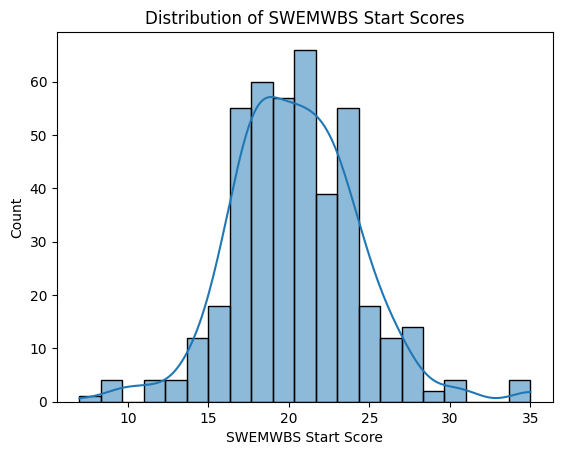

In [16]:
sns.histplot(df['SWEMWBS Start Score'], kde=True)
plt.title('Distribution of SWEMWBS Start Scores')
plt.show()

#### Distribution of SWEMWBS End Scores


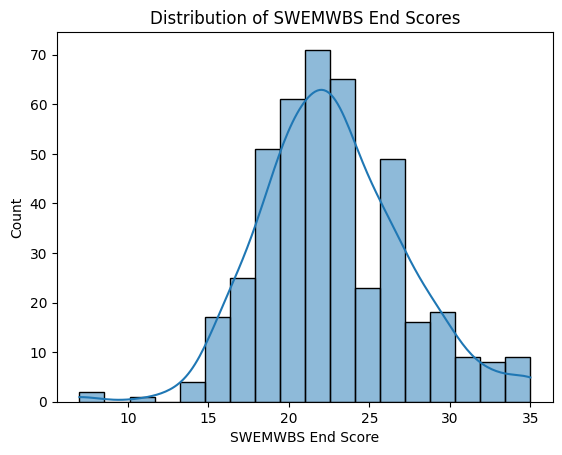

In [17]:
sns.histplot(df['SWEMWBS End Score'], kde=True)
plt.title('Distribution of SWEMWBS End Scores')
plt.show()

#### Distribution of SWEMWBS Change

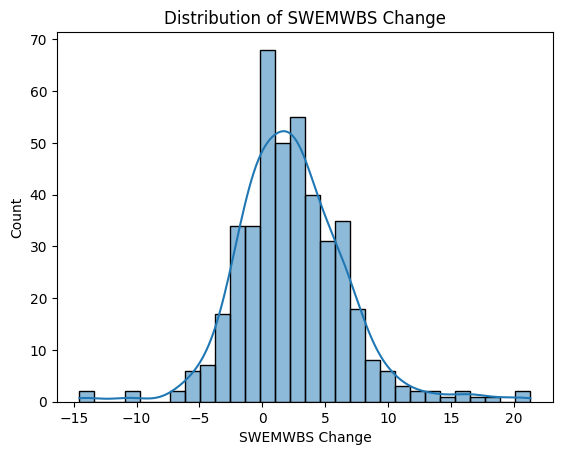

In [18]:
sns.histplot(df['SWEMWBS Change'], kde=True)
plt.title('Distribution of SWEMWBS Change')
plt.show()

### Correlation Analysis 

#### Correlation Matrix

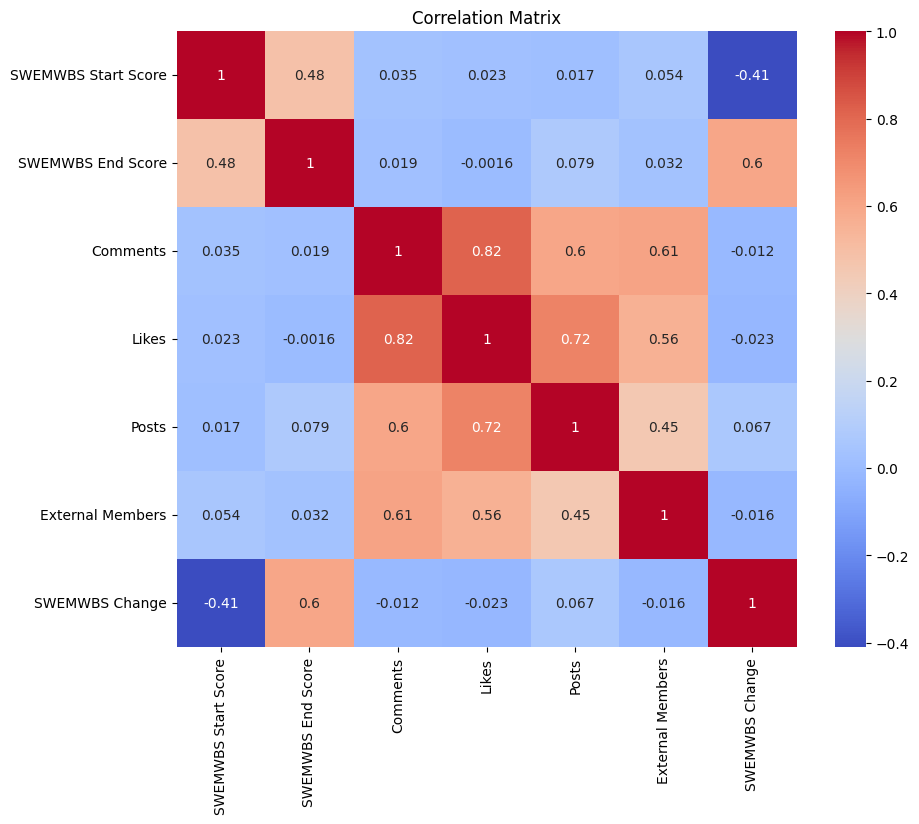

In [19]:
numeric_df = df.select_dtypes(include=[float, int])

if 'UIN' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['UIN'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Scatter plots to explore relationship between engagement metrics and SWEMWBS Change

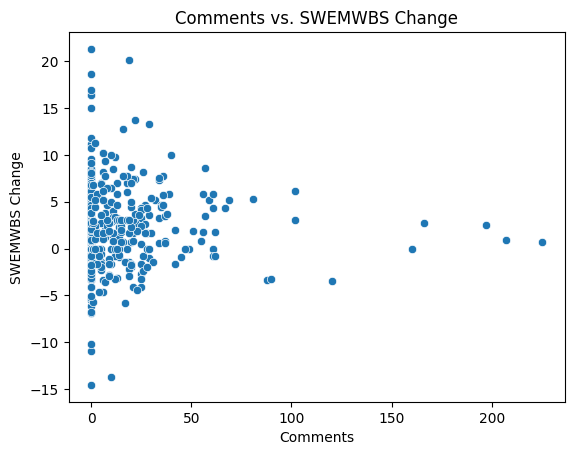

In [20]:
sns.scatterplot(data=df, x='Comments', y='SWEMWBS Change')
plt.title('Comments vs. SWEMWBS Change')
plt.show()

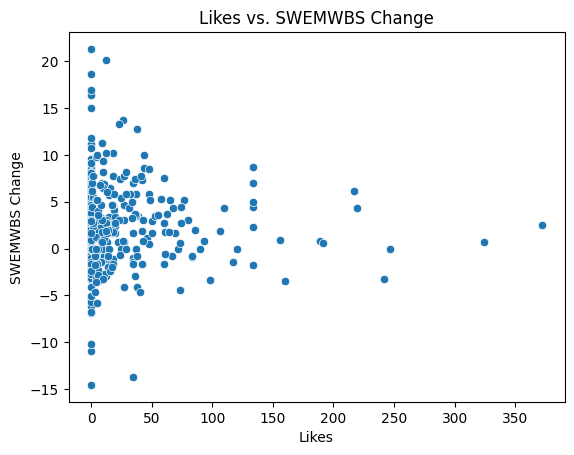

In [21]:
sns.scatterplot(data=df, x='Likes', y='SWEMWBS Change')
plt.title('Likes vs. SWEMWBS Change')
plt.show()

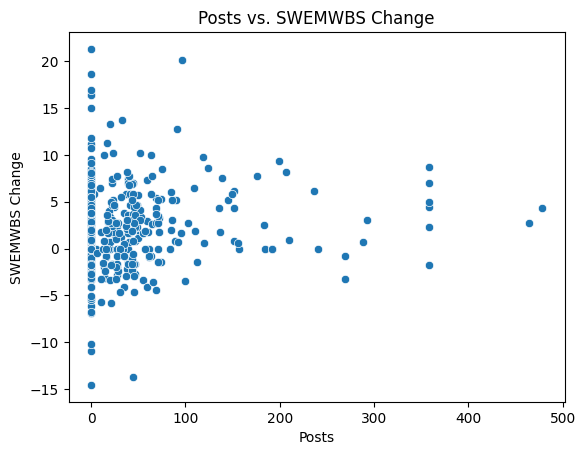

In [22]:
sns.scatterplot(data=df, x='Posts', y='SWEMWBS Change')
plt.title('Posts vs. SWEMWBS Change')
plt.show()

## Key Metrics & Grouped Analysis

### Wellbeing Impact

#### Average change in SWEMWBS score

In [23]:
average_change = df['SWEMWBS Change'].mean()
print(f'Average SWEMWBS Change: {average_change}')

Average SWEMWBS Change: 2.3386713286713285


#### Proportion of participants with positive, negative, or no change

In [24]:
positive_change = (df['SWEMWBS Change'] > 0).mean()
negative_change = (df['SWEMWBS Change'] < 0).mean()
no_change = (df['SWEMWBS Change'] == 0).mean()

print(f'Proportion of positive change: {positive_change}')
print(f'Proportion of negative change: {negative_change}')
print(f'Proportion of no change: {no_change}')

Proportion of positive change: 0.6666666666666666
Proportion of negative change: 0.24242424242424243
Proportion of no change: 0.09090909090909091


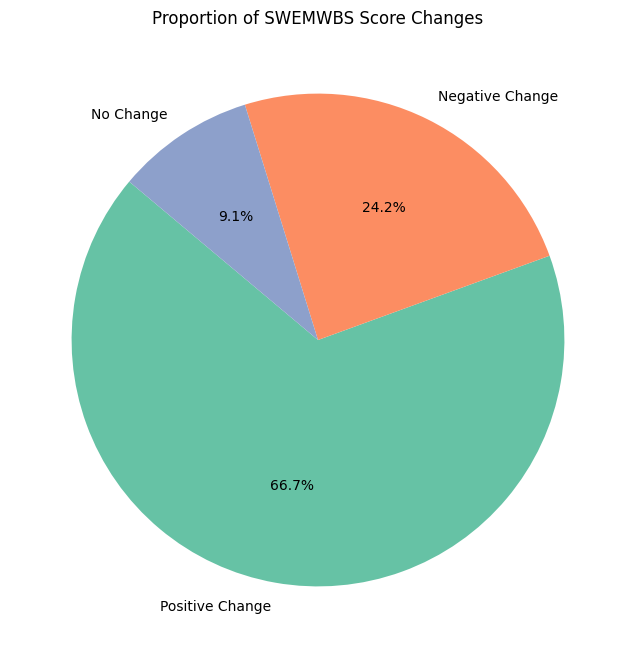

In [25]:
labels = ['Positive Change', 'Negative Change', 'No Change']
sizes = [positive_change, negative_change, no_change]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of SWEMWBS Score Changes')
plt.show()

### Grouped Analysis

#### SWEMWBS Change by Gender

In [26]:
gender_change = df.groupby('Gender')['SWEMWBS Change'].mean()
print(gender_change)

Gender
Female               2.743474
Male                 2.329420
Non-binary           4.920000
Other                2.200000
Prefer not to say   -7.605000
Unknown              1.989038
Name: SWEMWBS Change, dtype: float64


/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/1689667472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_change_df, x='Gender', y='SWEMWBS Change', palette='pastel')


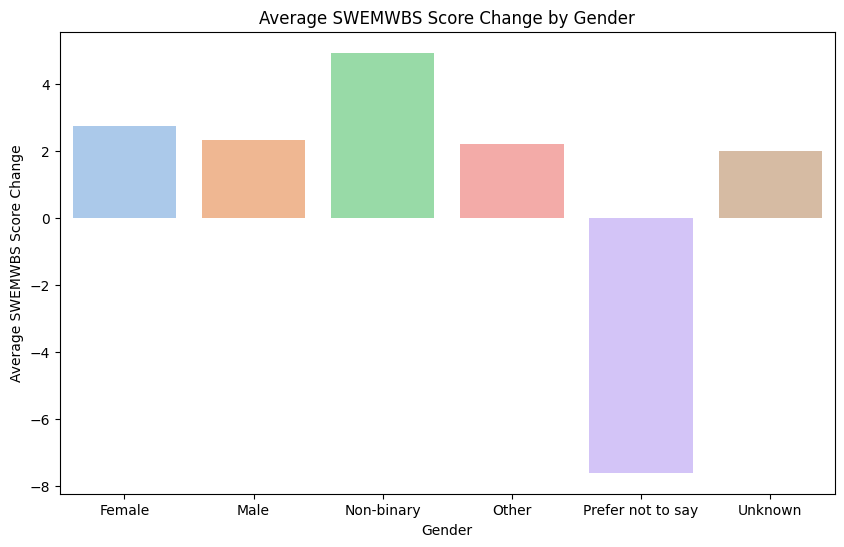

In [27]:
gender_change_df = gender_change.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_change_df, x='Gender', y='SWEMWBS Change', palette='pastel')
plt.title('Average SWEMWBS Score Change by Gender')
plt.xlabel('Gender')
plt.ylabel('Average SWEMWBS Score Change')
plt.show()

#### SWEMWBS Change by Ethnicity

In [28]:
ethnicity_change = df.groupby('Ethnicity')['SWEMWBS Change'].mean()
print(ethnicity_change)

Ethnicity
Any                                                                   3.131964
Asian                                                                 4.950000
Bangladesh                                                            7.750000
Black or Black British                                                1.520000
Black/African/Caribbean/Black British ? African                      16.880000
Decline to say                                                        3.995000
English/Welsh/Scottish/Northern Irish/British Irish                   2.363220
Mixed                                                                 1.655714
Mixed/multiple ethnic groups ? White and Black African background     1.850000
Not yet available                                                     6.680000
Other                                                                 2.082000
Other ? any other ethnic group                                        8.670000
Prefer not to say                         

/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/2414776923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ethnicity_change_df, x='Ethnicity', y='SWEMWBS Change', palette='pastel')


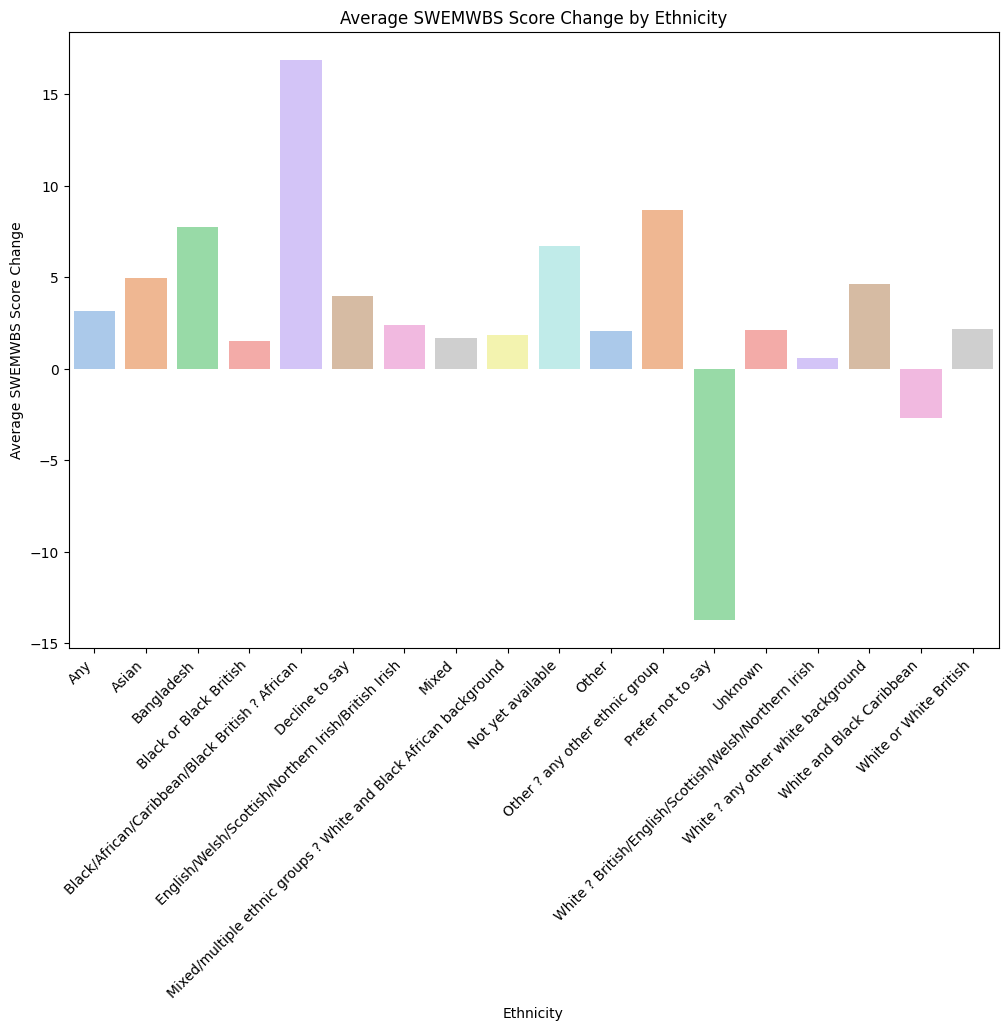

In [29]:
ethnicity_change_df = ethnicity_change.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=ethnicity_change_df, x='Ethnicity', y='SWEMWBS Change', palette='pastel')
plt.title('Average SWEMWBS Score Change by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average SWEMWBS Score Change')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### SWEMWBS Change by Age Group (You may need to create age groups)

In [30]:
df['SWEMWBS Start Age'] = pd.to_numeric(df['SWEMWBS Start Age'], errors='coerce')

In [31]:
print(df['SWEMWBS Start Age'].head())

0    15.0
1    15.0
2    14.0
3    14.0
4    12.0
Name: SWEMWBS Start Age, dtype: float64


In [32]:
bins = [0, 12, 18, 25, 35, 50, 65, 100]
labels = ['0-12', '13-18', '19-25', '26-35', '36-50', '51-65', '65+']

df['Age Group'] = pd.cut(df['SWEMWBS Start Age'], bins=bins, labels=labels, right=True)

print(df[['SWEMWBS Start Age', 'Age Group']].head())


   SWEMWBS Start Age Age Group
0               15.0     13-18
1               15.0     13-18
2               14.0     13-18
3               14.0     13-18
4               12.0      0-12


In [33]:
age_group_change = df.groupby('Age Group')['SWEMWBS Change'].mean()

print(age_group_change)

Age Group
0-12     1.475900
13-18    2.159270
19-25    5.581538
26-35    3.063333
36-50    6.426000
51-65    1.625000
65+           NaN
Name: SWEMWBS Change, dtype: float64


/var/folders/yh/drw5gh5d5m1903gvyn_xygsm0000gn/T/ipykernel_15821/2377743319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_change = df.groupby('Age Group')['SWEMWBS Change'].mean()


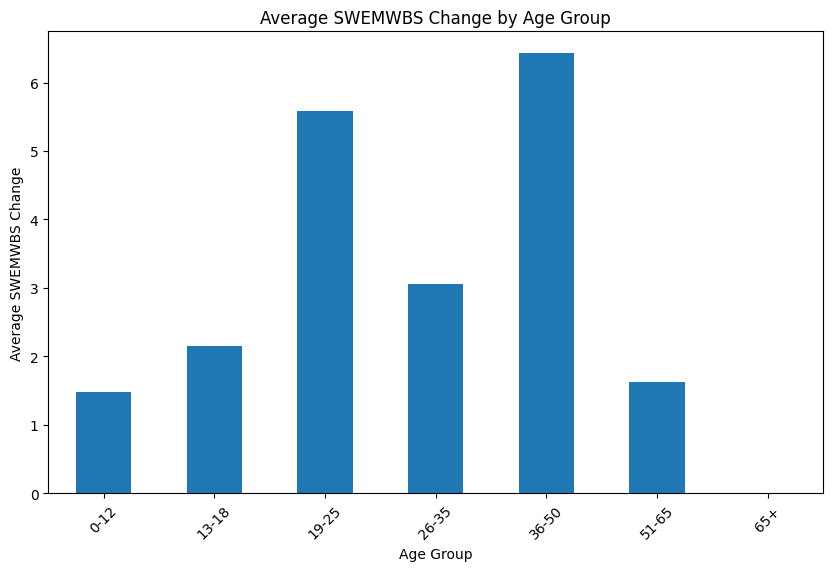

In [34]:
plt.figure(figsize=(10, 6))
age_group_change.plot(kind='bar')
plt.title('Average SWEMWBS Change by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average SWEMWBS Change')
plt.xticks(rotation=45)
plt.show()

#### Correlation between engagement and SWEMWBS Change

In [35]:
engagement_corr = df[['Comments', 'Likes', 'Posts', 'SWEMWBS Change']].corr()
print(engagement_corr)

                Comments     Likes     Posts  SWEMWBS Change
Comments        1.000000  0.815136  0.598749       -0.011711
Likes           0.815136  1.000000  0.724206       -0.022754
Posts           0.598749  0.724206  1.000000        0.066531
SWEMWBS Change -0.011711 -0.022754  0.066531        1.000000
